<a href="https://colab.research.google.com/github/swapnilsethi/Stat-5000/blob/main/RF_Model_and_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression using Random Forest**

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as **bagging**. 

In Short - Combine multiple decision trees instead of relying on single decision tree in determining final output.

**Bootstrap** - Randomly perform row smaping and feature sampling to form sample dataset.

**Aggregation** - *Classification* Probelm  - Majority voting;
              *Regression* Probelm - mean of all outputs
              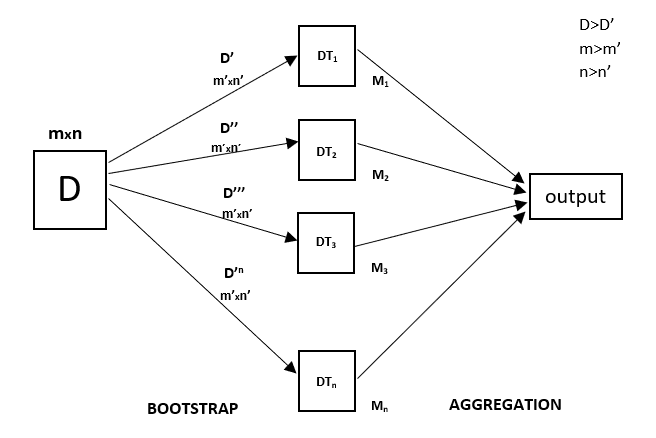

**Code**

Importing all the required  -

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split #to split data into training and testing sets
import math
import sys
np.set_printoptions(threshold=sys.maxsize)  #to display all data in array
pd.pandas.set_option('display.max_columns',None) #to display all columns in dataframe
from google.colab import files #to export dataframe as a csv files 
import graphviz
from sklearn.tree import export_graphviz #to plot decision trees


In [ ]:
# Reading feature engineered training data 
URL = ("https://raw.githubusercontent.com/swapnilsethi/Stat-5000/master/X_train.csv")
data = pd.read_csv(URL)

In [ ]:
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,0,1,60,2,65.0,8450,1,0,1,1,0,0,11,2,1,4,5,7,5,5,5,0,0,6,6,2,196.0,2,2,3,3,3,1,6,706.0,4,0.0,150.0,856.0,1,4,1,2,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,3,0,0,3,5.0,2,2.0,548.0,2,3,2,0,61,0,0,0,0,0,2,2008,2,2,208500.0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,20,2,80.0,9600,1,0,1,1,1,0,8,1,1,4,4,6,8,31,31,0,0,1,1,0,0.0,1,2,2,3,3,4,4,978.0,4,0.0,284.0,1262.0,1,4,1,2,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,3,1,2,3,31.0,2,2.0,460.0,2,3,2,298,0,0,0,0,0,0,5,2007,2,2,181500.0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,60,2,68.0,11250,1,1,1,1,0,0,11,2,1,4,5,7,5,7,6,0,0,6,6,2,162.0,2,2,3,3,3,2,6,486.0,4,0.0,434.0,920.0,1,4,1,2,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,3,1,2,3,7.0,2,2.0,608.0,2,3,2,0,42,0,0,0,0,0,9,2008,2,2,223500.0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,70,2,60.0,9550,1,1,1,1,2,0,12,2,1,4,5,7,5,91,36,0,0,2,2,0,0.0,1,2,1,2,4,1,4,216.0,4,0.0,540.0,756.0,1,3,1,2,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,3,1,3,1,8.0,1,3.0,642.0,2,3,2,0,35,272,0,0,0,0,2,2006,2,0,140000.0,0,0,0,0,0,0,0,0,0,0,0
4,4,5,60,2,84.0,14260,1,1,1,1,1,0,16,2,1,4,5,8,5,8,8,0,0,6,6,2,350.0,2,2,3,3,3,3,6,655.0,4,0.0,490.0,1145.0,1,4,1,2,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,3,1,2,3,8.0,2,3.0,836.0,2,3,2,192,84,0,0,0,0,0,12,2008,2,2,250000.0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#dropping unwanted columns
nan_replacer_identification_columns = [feature for feature in data if 'nan' in feature]

data = data.drop(['Unnamed: 0'],axis=1)
data = data.drop(nan_replacer_identification_columns, axis=1)

In [ ]:
X = data.drop(['SalePrice'],1)    #Features
Y = (data['SalePrice']).to_frame()  #labels

In [ ]:
X = np.array(X)
Y = np.array(Y) 

Now, we will split training data into two sections - train and test.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

Let's take a quick look at number of training and testing features and the labels :

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (1022, 76)
Training Labels Shape: (1022, 1)
Testing Features Shape: (438, 76)
Testing Labels Shape: (438, 1)


It looks as if everything is in order!

In [ ]:
y_train = y_train.flatten()
y_test =y_test.flatten()

# **Train Model**

Now I am done with data preparation, let's start creating and training the model.
 
I already imported the random forest regression model from skicit-learn. 

In intital, we will use 100 decision tress and random_state = 42 (Controls the randomsness of bootstrpping)

In [ ]:
# Instantiate model with 100 decision trees
base_model_regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [ ]:
# Train the model on training data
base_model_regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=42)

Now I'm attempting to illustrate decision tree in order to better comprehend the model.

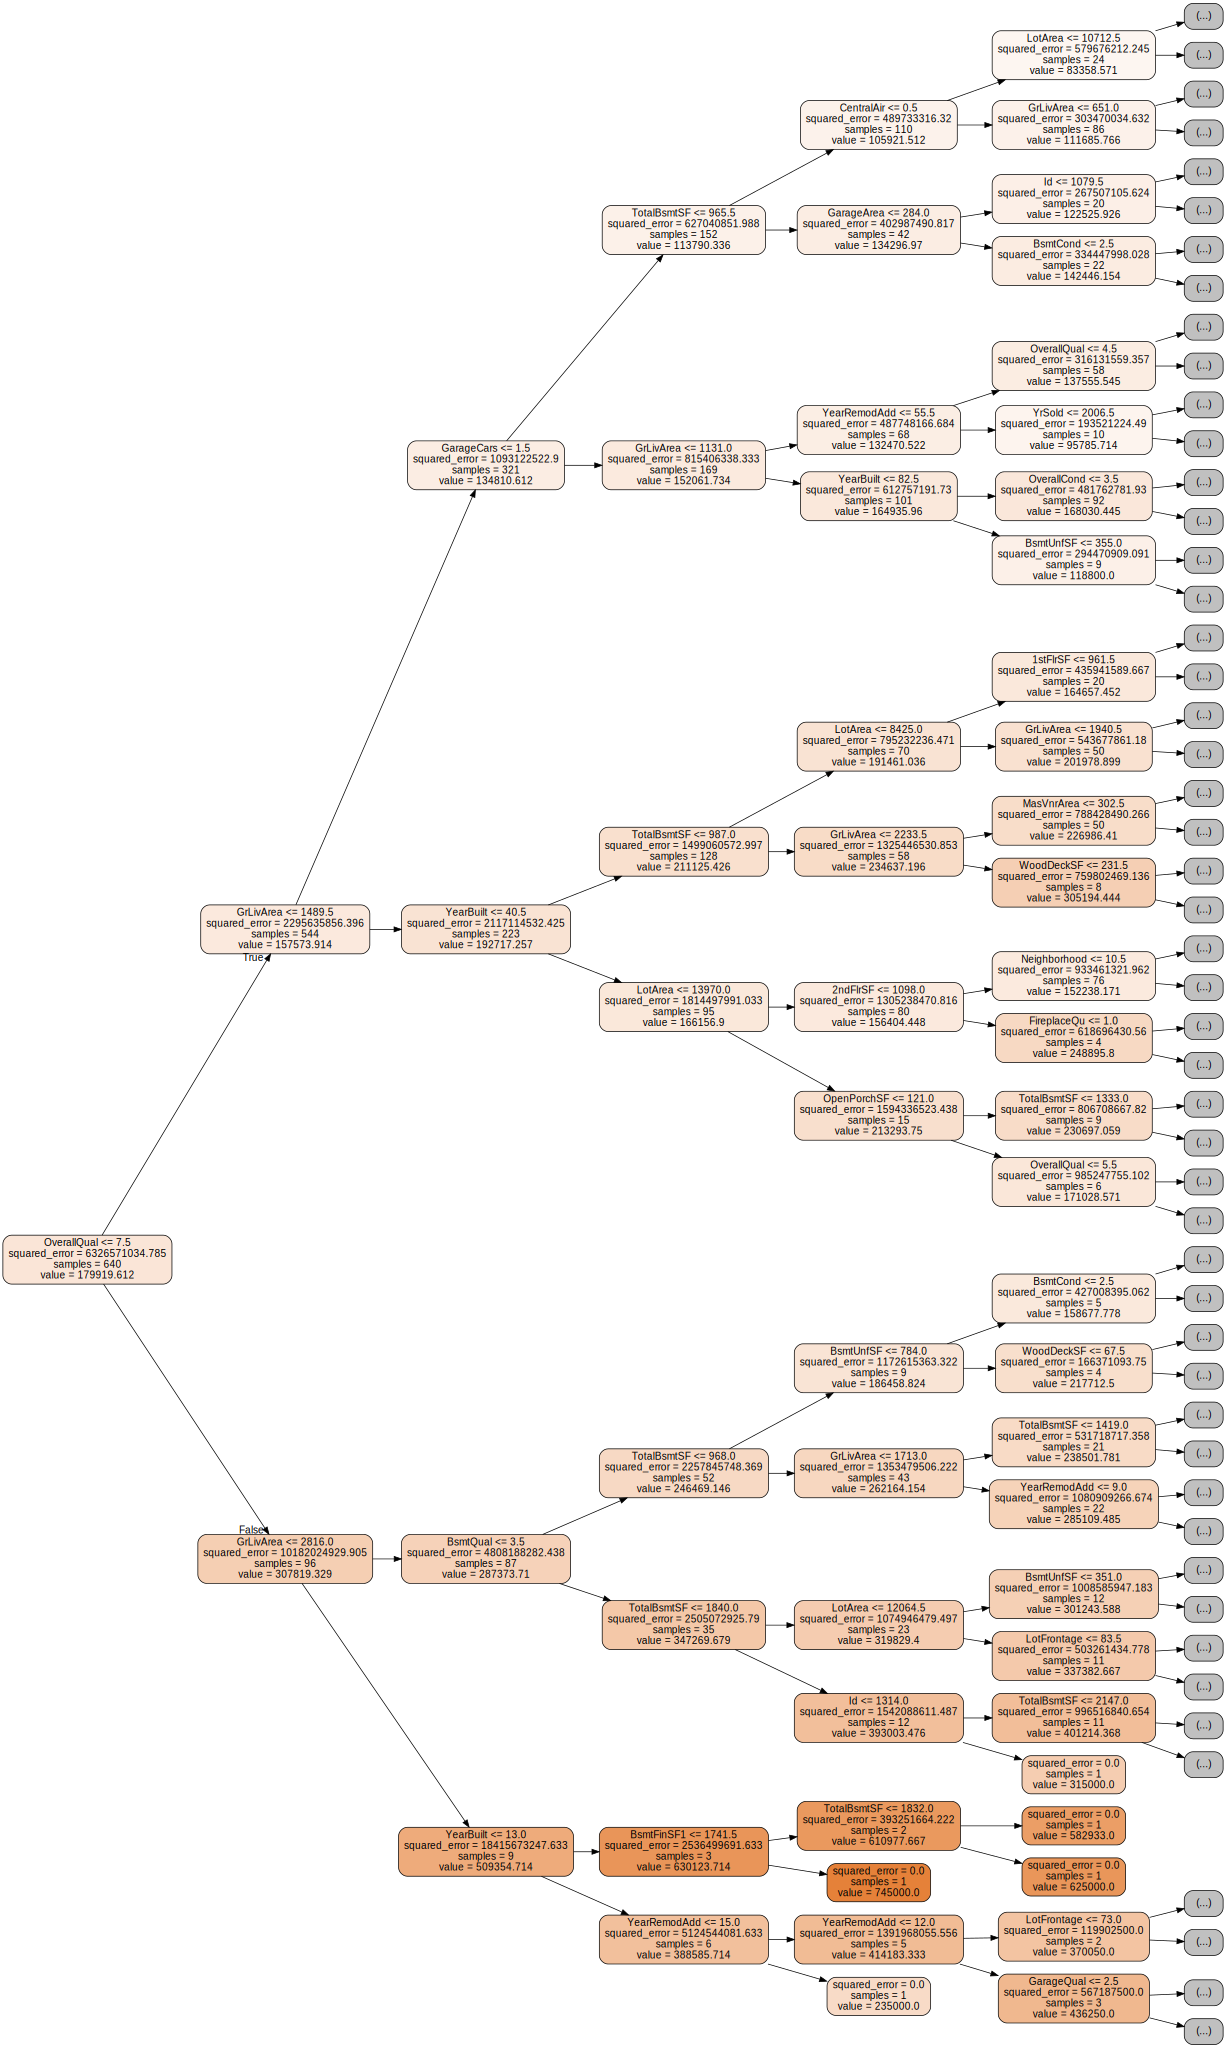

In [ ]:
dot_data = export_graphviz(base_model_regressor.estimators_[0],    ##0th node or 1St decision tree
                           feature_names=data.drop('SalePrice',axis=1).columns,
                           filled=True, impurity=True, 
                           rounded=True, max_depth = 5, rotate = True)

DecisonTree = graphviz.Source(dot_data, format='png')
DecisonTree

From above decision tree, I can conclude that Overall Quality of house is top most factor contributing in determining house Sale Price.

I will come back to this tree and features once again while working on feature selection. (to improve model performance)

 **Making Predictions on the Training Test Set and evaluate Accuracy**

My model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this I'll make predictions on the test features. I'll then compare the predictions to the known answers to calculate Accuracy.

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mse = sklearn.metrics.mean_squared_error(np.log(test_labels),np.log(predictions))
    RMSE = math.sqrt(mse)
    print('Model Performance')
    print('RMSE: {:0.4f} degrees.'.format(RMSE))
    return RMSE
base_accuracy = evaluate(base_model_regressor, X_test, y_test)

Model Performance
RMSE: 0.1398 degrees.


Our average estimate is off by 0.13980 degrees. That looks pretty good! Our model has learned how to predict the house sale price with 90.19% accuracy.

# **Making Predications on actual Test data**

In [ ]:
# Reading test data
URL = "https://raw.githubusercontent.com/swapnilsethi/Stat-5000/master/X_test.csv"

test_data_read = pd.read_csv(URL)
# Removing unwanted columns
nan_replacer_identification_columns = [feature for feature in test_data_read if 'nan' in feature]
test_data = test_data_read.drop(['Unnamed: 0'],axis=1)
test_data = test_data.drop(nan_replacer_identification_columns, axis=1)
test_data = np.array(test_data)

# Making Predications

Y_pred = base_model_regressor.predict(test_data)

Now that I've created predictions with our model, but since this is a Kaggle competition problem, I can submit the prediction file and have it checked for correctness.

**Predication File Generator**

In [ ]:
def Predications_file_generator(predications):
    ID = test_data_read.iloc[:, 1].values 
    pred = pd.DataFrame(ID, columns=['Id'])
    pred['SalePrice'] = predications.tolist()

    pred.to_csv('pred.csv')
    files.download('pred.csv')

In [ ]:
Predications_file_generator(Y_pred)

With this Model and Parameters I got **RMSE(calculated on logarithmic values) of 0.14916** (***Rank 2820***), which I think is pretty good in a first try. 

FYI: Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

# **Hyperparameter Tuning**

Though I thought I obtained really decent results with the RF model with 100 decision trees and Random test=42, I still have a lot of room to increase my rank and minimize RMSE. 

Now, in order to increase my model's performance, I'll try to find the best-suited parameters for it using the Random Search method.

What is Hyperparameters? 
Hyperparmeters is like the setting of an algorithm that can be adjusted to optimize the performace.

In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. (The parameters of a random forest are the variables and thresholds used to split each node learned during training).

Overfitting: If I optimize the model for the training data, then my model will score very well on the training set, but will not be able to generalize to new data, such as in a test set. When a model performs highly on the training set but poorly on the test set, this is known as overfitting, or essentially creating a model that knows the training set very well but cannot be applied to new problems.


I can overcome issue of Overfitting with Cross Validation. I'm using most common K-fold cross validation technique for the same. 

K-folds cross validation - 
In K-Fold CV, I'll split our training set into K number of subsets, called folds. Then iteratively fit the model K times, each time training the data on K-1 of the folds and evaluating on the Kth fold (called the validation data).

For example, consider fitting a model with K = 5. The first iteration I'll train on the first four folds and evaluate on the fifth. The second time I'll train on the first, second, third, and fifth fold and evaluate on the fourth. I'll repeat this procedure 3 more times, each time evaluating on a different fold. At the very end of training, I'll average the performance on each of the folds to come up with final validation metrics for the model.

**Random Search Cross Validation**

First, let's check the default parameters in RF model.

In [ ]:
from pprint import pprint
# Look at parameters used by our base model
print('Parameters currently in use:\n')
pprint(base_model_regressor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}



*  n_estimators = number of trees in the foreset
*  max_features = max number of features considered for splitting a node
*  max_depth = max number of levels in each decision tree
*  min_samples_split = min number of data points placed in a node before the node is split
*  min_samples_leaf = min number of data points allowed in a leaf node
*  bootstrap = method for sampling data points (with or without replacement)

I have tried to understand meaning and working of these parameters using above tree diagram.





I have used this Random forest [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for better understanding of all these parameters.

Currently, I only have vague idea of best hyperparamters; so best approch to find best hyperparameters is narrow my search to evaluate a wide range of values for each hyperparameter

In [ ]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
#Random Hyperparameter Grid 
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,3, 5, 7, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 5]

# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 32, 55, 77, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 5],
 'min_samples_split': [2, 3, 5, 7, 10],
 'n_estimators': [100, 177, 255, 333, 411, 488, 566, 644, 722, 800]}


Now, I am using RandomizedSearchCV function in Scikit to find best hyperparameters

I am using 3 fold cross validation and running 10 jobs in parallel.

In [ ]:
#Random Search Training
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# n_jobs =  Number of jobs to run in parallel; verbose = Controls the verbosity when fitting and predicting.
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=5, random_state=42, n_jobs = 10)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 32, 55, 77, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 5, 7, 10],
                                        'n_estimators': [100, 177, 255, 333,
                                                         411, 488, 566, 644,
                                                         722, 800]},
                   random_state=42, verbose=5)

Now, Let's look at our best parameters accoring to above Random Search Method.

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 55,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 488}

In [ ]:
regressor = RandomForestRegressor(bootstrap= False,
 max_depth= 55,
 max_features= 'sqrt',
 min_samples_leaf=  1,
 min_samples_split= 7,
 n_estimators= 488)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=55, max_features='sqrt',
                      min_samples_split=7, n_estimators=488)

Evaluate Random Search.

I already wrote a function to evaluate performance of model, I will call same function here.

In [ ]:
Hyperparameter_model = evaluate(regressor, X_test, y_test)

Model Performance
RMSE: 0.1405 degrees.


Compared to our base model Avg error got reduced and accuracy is also little improved.

I was expecting it as my training dataset is pretty small and for such small dataset 100 decision trees are also sufficient.

Predication file generation

In [ ]:
Y_pred_hyperparameter = base_model_regressor.predict(test_data)
Predications_file_generator(Y_pred_hyperparameter)

**Grid Search with Cross Validation**

Further to improve my results, I'm trying grid search to focus on the most promising hyperparameters ranges found in the random search.

Random search allowed me to narrow down the range for each hyperparameter. Now that I know where to concentrate my search, I can explicitly specify every combination of settings to try. I'll do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations I'll define. To use Grid Search, I'll make another grid based on the best values provided by random search:


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [45,50, 55, 60, 70],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [5, 6 , 7, 8],
    'n_estimators': [425, 450, 475, 500]
}
# Create a based model
GSBM = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = GSBM, param_grid = param_grid, 
                          cv = 3, n_jobs = 10, verbose = 5)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=10,
             param_grid={'bootstrap': [False],
                         'max_depth': [45, 50, 55, 60, 70],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [5, 6, 7, 8],
                         'n_estimators': [425, 450, 475, 500]},
             verbose=5)

In [ ]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 500}

In [ ]:
GSregressor = RandomForestRegressor(bootstrap= False,
 max_depth= 120,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 3,
 n_estimators= 500)
GSregressor.fit(X_test, y_test)

RandomForestRegressor(bootstrap=False, max_depth=120, max_features='sqrt',
                      min_samples_split=3, n_estimators=500)

In [ ]:
GSHyperparameter_model = evaluate(GSregressor, X_test, y_test)

Model Performance
Average Error: 897.3349 degrees.
Accuracy = 99.48%.


In [ ]:
Y_pred_GShyperparameter = GSregressor.predict(test_data)
Predications_file_generator(Y_pred_GShyperparameter)